In [104]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt

2.8.0


In [105]:
X = np.arange(-110, 110, 3)
y = np.arange(-100, 120, 3)

In [111]:
print(len(X))
X_train = X[:60]
y_train = y[:60]
X_test = X[60:]
y_test = y[60:]
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

74
60 14
60 14
(60,) (14,)
(60,) (14,)


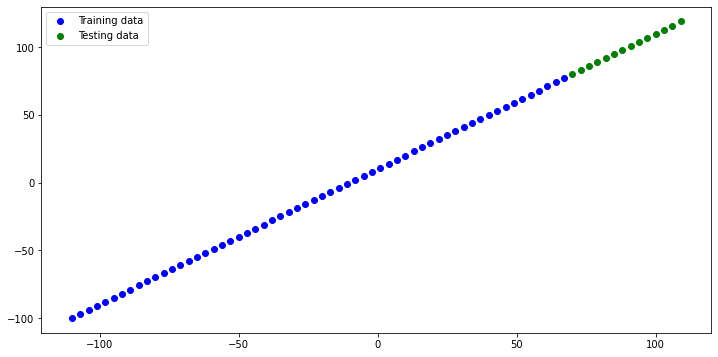

In [112]:
plt.figure( figsize = (12,6))
plt.scatter(X_train, y_train, c='b', label = 'Training data')
plt.scatter(X_test, y_test, c='g', label='Testing data')
plt.legend()

#Building Regression model with Neural Network

In [113]:
X_train.shape

(60,)

In [116]:
tf.random.set_seed(42)  #first we set random seed
#model = tf.keras.Sequential([
 #                            tf.keras.layers.Dense(1)
#])

model = tf.keras.Sequential()
model.compile( loss = tf.keras.losses.mae, #mae stands for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), #stochastic GD
              metrics = ['mae'])
model.fit( X_train, y_train, epochs = 10)

Epoch 1/10
2/2 [==============================] - 0s 8ms/step - loss: 10.0000 - mae: 10.0000
Epoch 2/10
2/2 [==============================] - 0s 5ms/step - loss: 10.0000 - mae: 10.0000
Epoch 3/10
2/2 [==============================] - 0s 13ms/step - loss: 10.0000 - mae: 10.0000
Epoch 4/10
2/2 [==============================] - 0s 7ms/step - loss: 10.0000 - mae: 10.0000
Epoch 5/10
2/2 [==============================] - 0s 8ms/step - loss: 10.0000 - mae: 10.0000
Epoch 6/10
2/2 [==============================] - 0s 10ms/step - loss: 10.0000 - mae: 10.0000
Epoch 7/10
2/2 [==============================] - 0s 6ms/step - loss: 10.0000 - mae: 10.0000
Epoch 8/10
2/2 [==============================] - 0s 7ms/step - loss: 10.0000 - mae: 10.0000
Epoch 9/10
2/2 [==============================] - 0s 8ms/step - loss: 10.0000 - mae: 10.0000
Epoch 10/10
2/2 [==============================] - 0s 7ms/step - loss: 10.0000 - mae: 10.0000


In [118]:
preds = model.predict([150])
preds

array([150])

In [146]:
X = X.reshape(37,2)
y = np.arange(-100, 120, 6).reshape(37,1)

In [147]:
print(len(X))
X_train = X[:30]
y_train = y[:30]
X_test = X[30:]
y_test = y[30:]
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

37
30 7
30 7
(30, 2) (7, 2)
(30, 1) (7, 1)


In [148]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential(tf.keras.layers.Dense(1))
model_1.compile( loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])
model_1.fit( X_train, y_train, epochs = 100, verbose = 1)

Epoch 1/100
1/1 [==============================] - 0s 306ms/step - loss: 31.7984 - mae: 31.7984
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 15.0955 - mae: 15.0955
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 22.8633 - mae: 22.8633
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 22.1338 - mae: 22.1338
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 21.6633 - mae: 21.6633
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 23.3129 - mae: 23.3129
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 21.8733 - mae: 21.8733
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 23.0898 - mae: 23.0898
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 22.0833 - mae: 22.0833
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 22.8668 - mae: 22.8668
Epoch 11/100
1/1 [==============================]

In [149]:
preds1 = model_1.predict(X_test)
preds1

array([[39.18904 ],
       [42.452606],
       [45.716175],
       [48.97974 ],
       [52.24331 ],
       [55.506874],
       [58.770443]], dtype=float32)

In [150]:
preds1.shape,y_test.shape

((7, 1), (7, 1))

In [153]:
def plot_preds(traindata = X_train,
               trainlabels = y_train,
               testdata = X_test,
               testlabels = y_test,
               predictions = preds):
  plt.figure(figsize=(12,6))
  plt.scatter(traindata, trainlabels, c="b", label="Training data")
  plt.scatter(testdata, testlabels, c="g", label="Testing data")
  plt.scatter(testlabels, predictions, c="r", label="Predictions")
  plt.legend()

ValueError: ignored

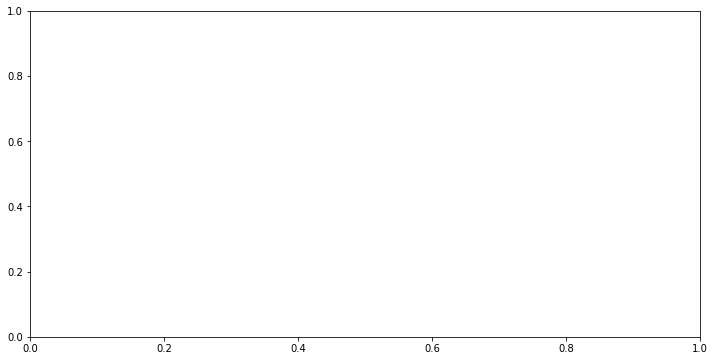

In [154]:
plot_preds(traindata = X_train,

           trainlabels = y_train,

           testdata = X_test,

           testlabels = y_test,

           predictions = preds1)

In [124]:
mae = tf.metrics.mean_absolute_error( y_true = y_test,
                                      y_pred = preds)
mae

<tf.Tensor: shape=(), dtype=int64, numpy=50>

In [125]:
y_test.shape, preds.shape

((14,), (1,))

In [126]:
preds.squeeze().shape

()

In [127]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=preds.squeeze()).numpy()
mse = tf.metrics.mean_squared_error(y_true = y_test,
                                      y_pred=preds.squeeze()).numpy()
mae, mse

(50, 2696)

In [129]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
       #                        tf.keras.layers.Dense(1),
       #                        tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
model_2.fit(X_train, y_train, epochs=100, verbose=0)

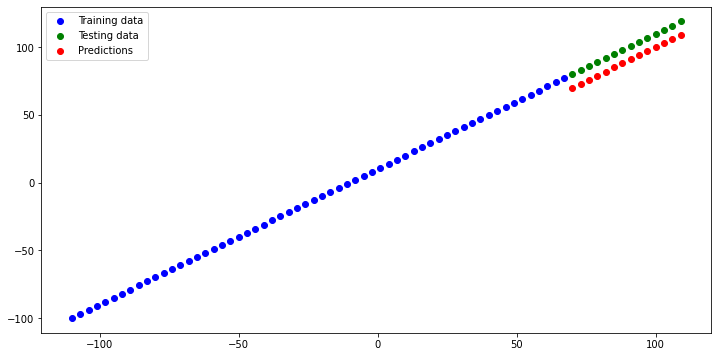

In [130]:
preds_2 = model_2.predict(X_test)
plot_preds(predictions=preds_2)


In [131]:
mae_2 = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=preds_2.squeeze()).numpy()
mse_2 = tf.metrics.mean_squared_error(y_true = y_test,
                                      y_pred=preds_2.squeeze()).numpy()
mae_2,mse_2

(10, 100)

In [132]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
model_3.fit(X_train, y_train, epochs=100, verbose=0)

ValueError: ignored

In [ ]:
mae_3 = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=preds_3.squeeze()).numpy()
mse_3 = tf.metrics.mean_squared_error(y_true = y_test,
                                      y_pred=preds_3.squeeze()).numpy()
mae_3,mse_3

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([

  tf.keras.layers.Dense(100),

  tf.keras.layers.Dense(10),

  tf.keras.layers.Dense(1)
m.set_seed(42)
model_4 = tf.keras.Sequential([
tf.keras.layers.Dense(100),
tf.keras.layers.Dense(10),
tf.keras.layers.Dense(1)
])
model_4.compile(loss=tf.keras.losses.mae,
optimizer=tf.keras.optimizers.Adam(),
metrics=['mae'])
mo
])

model_4.compile(loss=tf.keras.losses.mae,

                optimizer=tf.keras.optimizers.Adam(),

                metrics=['mae'])

model_4.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
preds_4 = model_4.predict(X_test)
plot_preds(predictions=preds_4)

In [ ]:
mae_4 = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=preds_4.squeeze()).numpy()
mse_4 = tf.metrics.mean_squared_error(y_true = y_test,
                                      y_pred=preds_4.squeeze()).numpy()
mae_4,mse_4

In [ ]:
tf.random.set_seed(42)
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(1)
])
model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
model_5.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
preds_5 = model_5.predict(X_test)

In [ ]:
mae_5 = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=preds_5.squeeze()).numpy()
mse_5 = tf.metrics.mean_squared_error(y_true = y_test,
                                      y_pred=preds_5.squeeze()).numpy()
mae_5, mse_5

In [ ]:
tf.random.set_seed(42)
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
model_6.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
model_6.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
preds_6 = model_6.predict(X_test)
mae_6 = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=preds_6.squeeze()).numpy()
mse_6 = tf.metrics.mean_squared_error(y_true = y_test,
                                      y_pred=preds_6.squeeze()).numpy()
mae_6, mse_6

In [ ]:
model_results = [['model_1', mae, mse],

                 ['model_2', mae_2, mse_2],

                 ['model_3', mae_3, mse_3], 

                 ['model_4', mae_4, mse_4], 

                 ['model_5', mae_5, mse_5],
                 ['model_6', mae_6, mse_6]] 

In [ ]:
model_results = [['model_1', mae, mse],

                 ['model_2', mae_2, mse_2],

                 ['model_3', mae_3, mse_3], 

                 ['model_4', mae_4, mse_4], 

                 ['model_5', mae_5, mse_5],
                 ['model_6', mae_6, mse_6]] 